# Partie 1 (Data Visualisation):

## 1. En utilisant pandas essayer d’explorer les données du Data set.

In [99]:
# imports libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from pandas.plotting import scatter_matrix
from sklearn.cluster import KMeans

from sklearn.preprocessing import MinMaxScaler
import skfuzzy as fuzz
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from skfuzzy.cluster import cmeans

In [59]:
# exploration de data avec pandas
df = pd.read_csv("datasets/CC GENERAL.csv")
# afficher les trois premier lignes de dataset salaire
df.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [60]:
# la forme de dataset
df.shape

(8950, 18)

## 2. Afficher le résumer statistique du Data Sets avec une interprétation des résultats obtenues.

In [61]:
df.info()
# Le DataFrame a une plage d'index allant de 0 à 8949, avec un total de 8950 entrées (lignes).
# Le DataFrame contient 18 colonnes .
# Chaque colonne a un nombre non nul d'entrées qui est donné par Non-Nubll Count.
# La plupart des colonnes ont le type de données float64, sauf trois colonnes CASH_ADVANCE_TRX, PURCHASES_TRX, et TENURE qui ont le type int64, et une colonne CUST_ID qui a le type object.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [62]:
# decouvrir les features qui ont des valeurs monquant
[features for features in df.columns if df[features].isnull().sum()>0]

['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']

In [63]:
# l COLONNE MINIMUM_PAYMENTS contient plusieur donnees null 
print(f"MINIMUM_PAYMENTS : {df['MINIMUM_PAYMENTS'].isnull().sum()}")
print(f"CREDIT_LIMIT : {df['CREDIT_LIMIT'].isnull().sum()}")

MINIMUM_PAYMENTS : 313
CREDIT_LIMIT : 1


In [64]:
# remplacer les valeurs null par le moyenne et le mode 
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].replace(np.NaN , df['MINIMUM_PAYMENTS'].mean())
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mode()[0])

In [65]:
# recalculer la somme des valerus null
print(f"MINIMUM_PAYMENTS : {df['MINIMUM_PAYMENTS'].isnull().sum()}")
print(f"CREDIT_LIMIT : {df['CREDIT_LIMIT'].isnull().sum()}")


MINIMUM_PAYMENTS : 0
CREDIT_LIMIT : 0


In [66]:
# afficher le resume statistique dataset/salaire 
df.describe() 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## 3. Afficher les nuages des points du  data set  selon les propriétés « Features » en utilisant matplotlib et pandas « scatter_matrix »

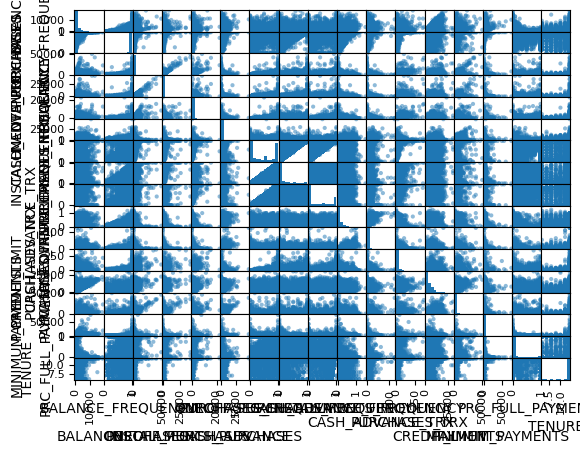

In [67]:
# la nuage des points du  data set «pima-indians-diabetes.csv» 
scatter_matrix(df)
plt.show()
# scatter_matrix : Elle affiche la relation entre chaque paire de variables numériques dans notre ensemble de donnees 

# Partie 2 (Clustering )

## 1. Essayer de construire le modèle de clustering en utilisant sklearn ainsi algorithme Kmeans

In [68]:
# X = df.iloc[:, 1:].values
# print(X.shape)
# X

In [69]:
#Pour la visualisation, on utilise juste les variables BALANCE_FREQUENCY et PURCHASES 
X = df.iloc[:, [2, 3]].values
X

array([[8.18182e-01, 9.54000e+01],
       [9.09091e-01, 0.00000e+00],
       [1.00000e+00, 7.73170e+02],
       ...,
       [8.33333e-01, 1.44400e+02],
       [8.33333e-01, 0.00000e+00],
       [6.66667e-01, 1.09325e+03]])

In [70]:
# Instancier le scaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)
# X

In [71]:
# 3 cluster (wcss Elbow method)

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, ..., 1, 1, 1])

## 2. Définir le K nécessaire pour avoir un modèle efficace selon la méthode de Elbow.

In [72]:
# calculer wss pour 12 valeur de k 
wcss = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

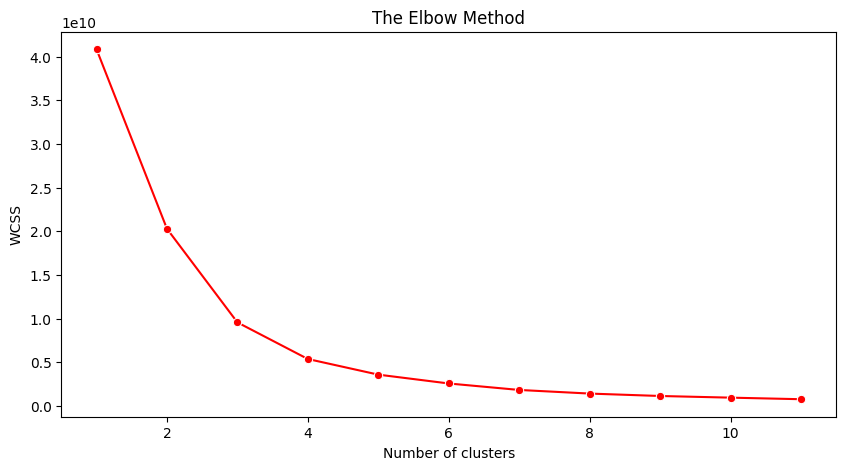

In [73]:
# chercher le meilleur valeur de k (nbr de clusters )
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1, 12), y=wcss, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
# meilleur k = 3 selon the Elbow Method

## 3. Présenter les cluster obtenues dans un graphes en utilisant matplotlib.

In [74]:
# refaire kmeans pour k = 4( puisque il est le meilleur nbr de cluster selon Elbow Method )
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[0 0 0 ... 0 0 0]


C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


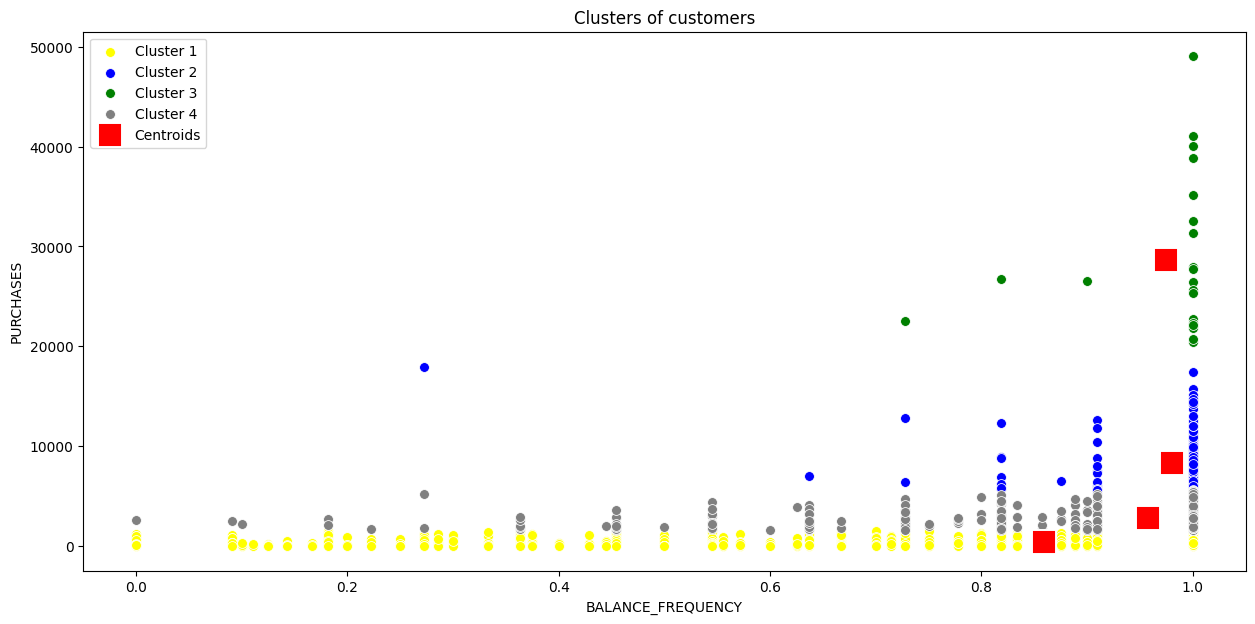

In [75]:
# Graph qui montre les clusters 
plt.figure(figsize=(15,7))
sns.scatterplot(x=X[y_kmeans == 0, 0], y=X[y_kmeans == 0, 1], color='yellow', label='Cluster 1', s=50)
sns.scatterplot(x=X[y_kmeans == 1, 0], y=X[y_kmeans == 1, 1], color='blue', label='Cluster 2', s=50)
sns.scatterplot(x=X[y_kmeans == 2, 0], y=X[y_kmeans == 2, 1], color='green', label='Cluster 3', s=50)
sns.scatterplot(x=X[y_kmeans == 3, 0], y=X[y_kmeans == 3, 1], color = 'grey', label ='Cluster 4',s=50)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color='red', label='Centroids', s=300, marker=',')
plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('BALANCE_FREQUENCY')
plt.ylabel('PURCHASES')
plt.legend()
plt.show()


## 4. Interpréter les résultats obtenus.

In [76]:
# Les clients dans le premier groupe, représentés par les points verts, ont un montant d'achat élevé et leurs soldes 
# sont fréquemment mis à jour. Cela peut être interprété comme des clients actifs et fidèles, qui effectuent régulièrement des achats importants
# et sont en contact fréquent avec l'entreprise pour mettre à jour leur solde. 
# Ces clients peuvent être considérés comme très précieux pour l'entreprise,car ils génèrent des revenus importants et sont engagés dans la relation client.

# Les clients dans le deuxième groupe, représentés par les points jaunes, ont un montant d'achat très bas et leurs soldes 
# sont rarement mis à jour. Ils peuvent être considérés comme des clients "dormants" ou "inactifs" et 
# nécessitent peut-être une stratégie de réactivation ou de fidélisation.

# Les clients dans le troisième groupe, représentés par les points bleus,Ces clients peuvent être considérés comme des clients réguliers mais moins engagés que les clients 
# du premier groupe


## 5.  Refaire la même chose en utilisant l’algorithme fuzzy cmeans «   il faut utiliser la bibliothèque skfuzzy »

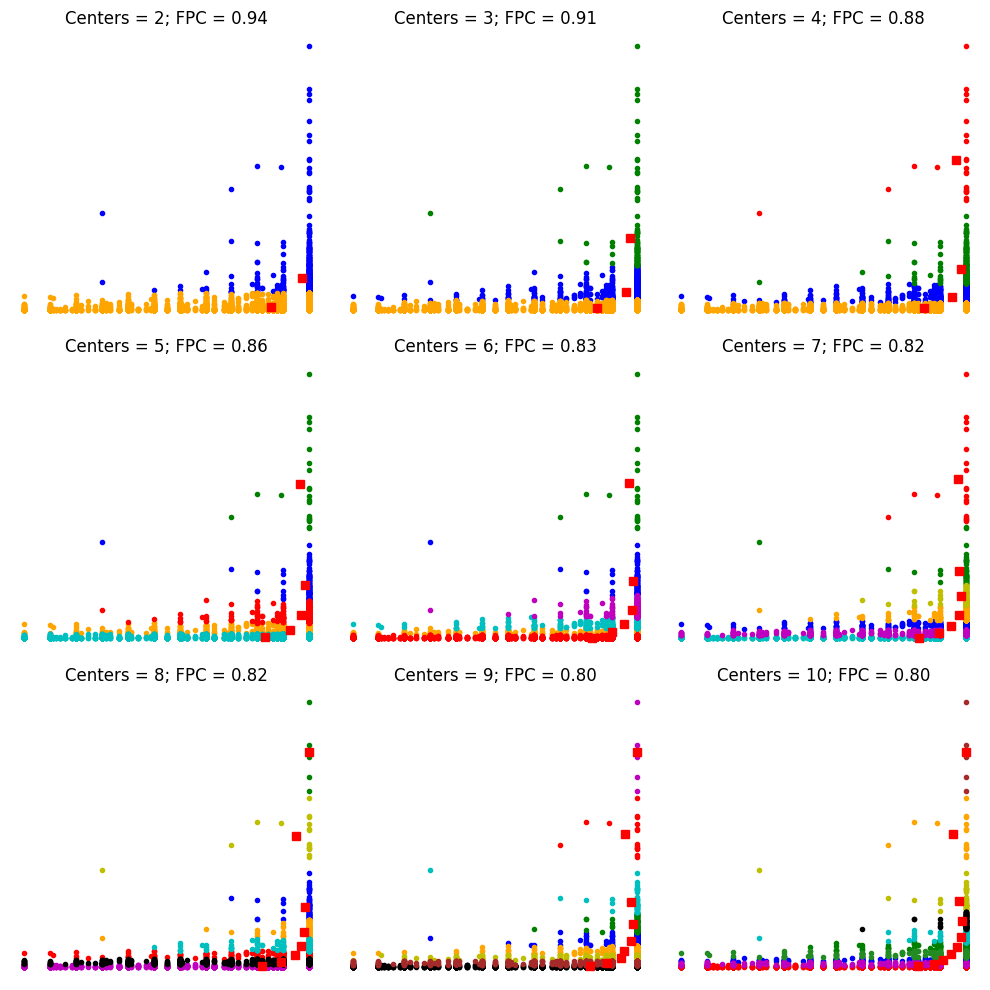

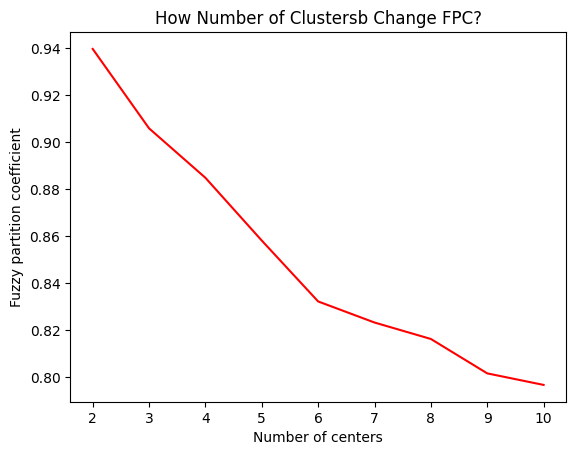

In [90]:
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown','ForestGreen'] 

xpts = X[:, 0] 
ypts = X[:, 1] 


fig1, axes1 = plt.subplots(3, 3, figsize=(10, 10)) 
#Pour empiler les points(x,y) 
alldata = np.vstack((xpts, ypts)) 
#Initialisation du tableau des fuzzy clusters 
fpcs = []
 
for ncenters, ax in enumerate(axes1.reshape(-1), 2): 
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(alldata, ncenters, 2, error=0.005, maxiter=1000, init=None) 
 
    #On ajoute à chaque fois au tableau le fuzzy cluster qu'on a 
    fpcs.append(fpc) 
 
    # Pour traces les clusters 
    cluster_membership = np.argmax(u, axis=0) 
    for j in range(ncenters): 
        ax.plot(xpts[cluster_membership == j],ypts[cluster_membership == j], '.', color=colors[j]) 
 
    # Pour marquer le centre de chaque cluster 
    for pt in cntr: 
        ax.plot(pt[0], pt[1], 'rs') 
 
    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters,fpc), size=12)  
    ax.axis('off') 
 
# Pour ajuster l'emplacement des axes 
fig1.tight_layout() 
#Pour dessiner plusieurs tracés sur une seule figure 
fig2, ax2 = plt.subplots() 
ax2.plot(np.r_[2:11], fpcs, color='r') 
ax2.set_title("How Number of Clustersb Change FPC?") 
ax2.set_xlabel("Number of centers") 
ax2.set_ylabel("Fuzzy partition coefficient") 
plt.show()

## 6.  Refaire la même chose en utilisant l’algorithme DBSCAN et Tsne.

In [78]:
# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [79]:
# 1 - DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=3)
clusters = dbscan.fit_predict(X_scaled)


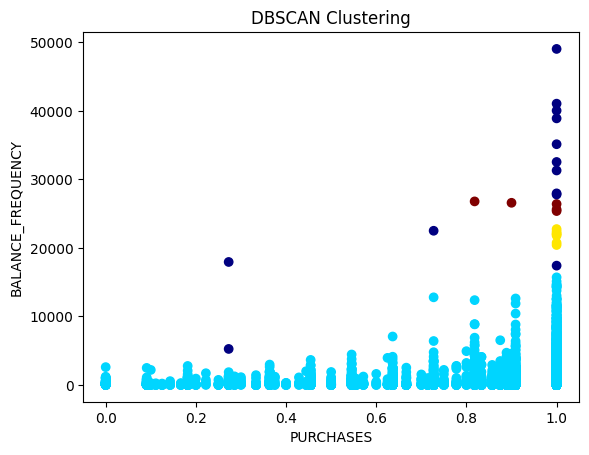

In [80]:
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='jet')
plt.xlabel("PURCHASES")
plt.ylabel("BALANCE_FREQUENCY")
plt.title("DBSCAN Clustering")
plt.show()


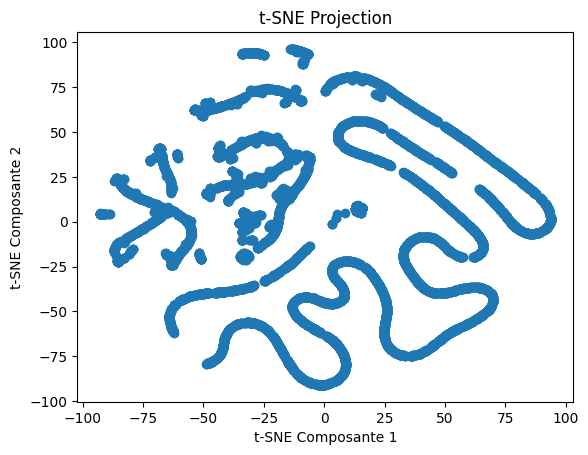

In [89]:
# Appliquer l'algorithme t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualiser les résultats
plt.scatter(X_tsne[:,0], X_tsne[:,1])
plt.xlabel("t-SNE Composante 1")
plt.ylabel("t-SNE Composante 2")
plt.title("t-SNE Projection")
plt.show()

## Comparer les quatre algorithmes et faire une conclusion globale sur ces méthodes de clustering et Tsne

In [100]:
# KMeans clustering
kmeans_silhouette = silhouette_score(X, kmeans.labels_)

# DBSCAN clustering
dbscan_silhouette = silhouette_score(X, dbscan.labels_)

# Fuzzy CMeans clustering
fuzzy_cmeans = cmeans(X.T, 3, 2, error=0.005, maxiter=1000)
fuzzy_cmeans_silhouette = silhouette_score(X, np.argmax(fuzzy_cmeans[1], axis=0))

print("KMeans silhouette score:", kmeans_silhouette)
print("DBSCAN silhouette score:", dbscan_silhouette)
print("Fuzzy CMeans silhouette score:", fuzzy_cmeans_silhouette)
# mais comme d'habitude sans rien faire en 

KMeans silhouette score: 0.7352780140320683
DBSCAN silhouette score: 0.929340500218507
Fuzzy CMeans silhouette score: 0.7520605033236739


In [ ]:
la on peut voir que le score de silhouette de DBSCAN est le plus élevé, suivi de Fuzzy CMeans et de KMeans.
Toutefois, il est important de noter que le score de silhouette est influencé par plusieurs facteurs tels que la distance
choisie et la méthode de regroupement utilisée, ainsi que les paramètres spécifiques de chaque algorithme. 